# <span style="color:red">Segmentation de la clientèle

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [145]:
data= pd.read_csv("C:/Users/mmeri/Downloads/archive/marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# <span style="color:blue">Analyse exploratoire des données



In [146]:
data["TotalAmountSpent"] = data["MntFishProducts"] + data["MntFruits"] + data["MntGoldProds"] + data["MntSweetProducts"] + data["MntMeatProducts"] + data["MntWines"]


### <span style="color:green">Age des clients (Year_Birth)

In [147]:
# Transformation de la colonne age en datetime
data["Age"] = data["Year_Birth"].apply(lambda x : datetime.now().year - x)


In [148]:
# Statistique de la variable age
data["Age"].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

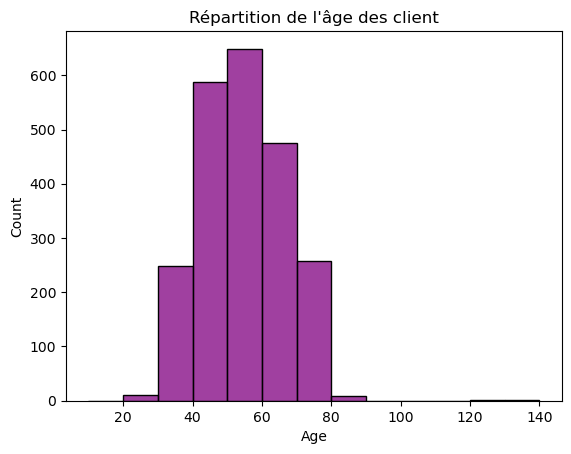

In [149]:
sns.histplot(data=data, x="Age", bins = list(range(10, 150, 10)), color="purple")
plt.title("Répartition de l'âge des client")
plt.savefig("Age.png");

#### la répartition par âge de nos clients se situe entre 40 et 60 ans

### <span style="color:green">Education



In [150]:
# traitement des donnée
data["Education"] = data["Education"].replace({"Graduation":"Graduate", "PhD":"Postgraduate", "Master":"Postgraduate", "2n Cycle":"Postgraduate", "Basic":"Undergraduate"})

In [151]:
data["Education"].value_counts()


Graduate         1127
Postgraduate     1059
Undergraduate      54
Name: Education, dtype: int64

In [152]:
data["Education"].unique()


array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

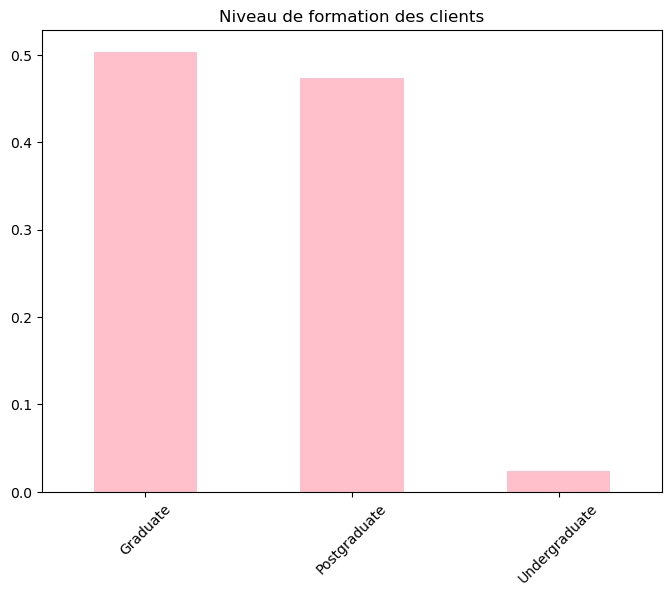

In [153]:
data["Education"].value_counts(normalize=True).plot.bar(figsize=(8, 6),color="pink")
plt.xticks(rotation=45)
plt.title("Niveau de formation des clients");

#### on constate que le nombre le plus élevé des clients ont obtenu un diplôme de premier cycle suivie des clients qui ont un master ou phd, et  le nombre le plus faible est réservé aux clients  qui ont un niveai d'études basic.


### <span style="color:green">État civil


In [154]:
data["Marital_Status"].unique()


array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [155]:
data["Marital_Status"] = data["Marital_Status"].replace({"Together":"Married", "Absurd":"Single", "Divorced":"Single", "Alone":"Single", "YOLO":"Single", "Widow":"Single"})


In [156]:
fig = px.bar(
    data["Marital_Status"].value_counts(normalize=True),
    title = "Proportion de l'état civil des clients",
    height=500
)
fig.update_layout(yaxis_title = "Freuency [proportion]")
fig.show()

#### Environ 64% des clients sont mariés, tandis que 35% sont single 

<div style="color:red">

### <span style="color:green">Revenu

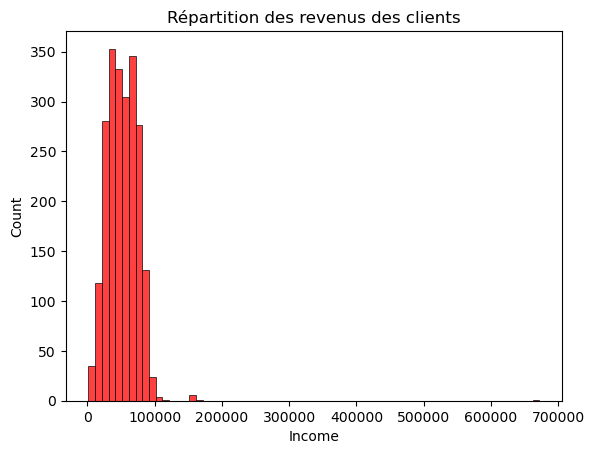

In [157]:
sns.histplot(data=data, x="Income", binwidth=1e4,color="red")
plt.title("Répartition des revenus des clients");

#### On voit que la majorité des revenus des clients se situent entre 0 et 100 000. Cependant, nous avons d'autres clients qui gagnent bien plus que cela (plus de 600 000 $)

### <span style="color:green">Nombre d'enfants à la maison


In [158]:
data["Kidhome"].unique()

array([0, 1, 2], dtype=int64)

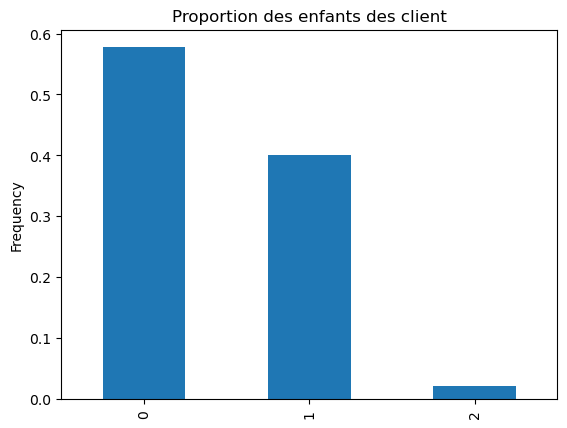

In [159]:
data["Kidhome"].value_counts(normalize=True).plot.bar()
plt.ylabel("Frequency")
plt.title("Proportion des enfants des client");

#### Environ la moitié des clients n'ont pas d'enfants (58%)

### <span style="color:green">Total dépensé


In [160]:
data["TotalAmountSpent"].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: TotalAmountSpent, dtype: float64

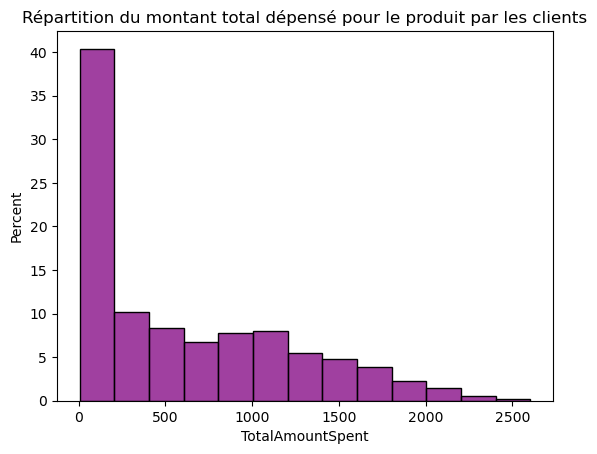

In [161]:
sns.histplot(data=data, x="TotalAmountSpent", binwidth=200, stat="percent",color="purple")
plt.title("Répartition du montant total dépensé pour le produit par les clients");

#### 40% du montant dépensé par les clientsse situe entre 0 et 200$

# <span style="color:blue">Analyse bivariée

### <span style="color:green">Âge VS Montant total dépensé

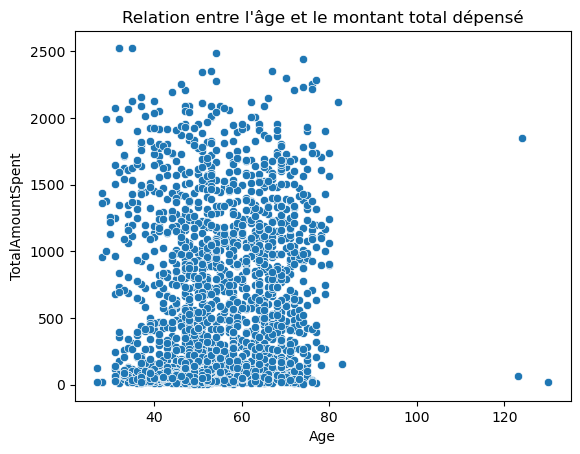

In [162]:
sns.scatterplot(data=data, x="Age", y="TotalAmountSpent")
plt.title("Relation entre l'âge et le montant total dépensé");

#### Il y a pas de corrélation positive entre l'âge et le montant total dépensé c'est-à-dire que la comparaison ci-dessus nous indique que l'âge ne permet pas de déduire le montant total qui sera dépensé par les clients.

In [163]:
def group_age(age):
    if age <20:
        return "11-20"
    elif age > 20 and age <31:
        return "21-30"
    elif age > 30 and age <41:
        return "31-40"
    elif age > 40 and age <51:
        return "41-50"
    elif age > 50 and age <61:
        return "51-60"
    elif age > 60 and age <71:
        return "61-70"
    elif age > 70 and age <81:
        return "71-80"
    elif age > 80:
        return ">80"

In [92]:
data["Age Group"] =data["Age"].apply(group_age)

order = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80"]

In [103]:
mask = data.groupby("Age Group")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Age Group", y="TotalAmountSpent", height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +20,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
fig.show()

#### Il apparaît que le groupe qui dépense le plus en moyenne est celui des clients âgés de 21 à 30 ans, suivi des clients âgés de 71 à 80 ans

### <span style="color:green">Âge VS revenu


In [112]:
from scipy.stats import iqr


In [113]:
iqr = iqr(data["Income"], nan_policy="omit")


low = np.nanquantile(data["Income"], 0.25) - 1.5 * iqr
high = np.nanquantile(data["Income"], 0.75) + 1.5 * iqr

In [114]:
data_cut =data[data["Income"].between(low, high)]


In [115]:
mask = data_cut.groupby("Age Group")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Age Group", y="Income", height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

#### la tranche d'âge qui gagne le plus en moyenne est celle des clients âgés de plus de 80 ans, suivie de celle des clients âgés de 71 à 80 ans. En dehors des clients âgés de 21 à 30 ans, on observe une tendance qui postule que plus la tranche d'âge augmente, plus les revenus augmentent.

# <span style="color:blue">Analyse à plusieurs variables


### <span style="color:green">Niveau d'études vs revenu vs total dépensé

In [117]:
fig = px.scatter(
    data_frame=data_cut,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "Education",
    height=500
)
fig.show()

#### Nous pouvons constater que les personne en premier cycle gagnent moins que les autres clients, c'est pourquoi ils dépensent moins.

### Lanalyse exploratoire des données nous a permis de constater que le revenu était vraiment l'indicateur clé qui déterminait le montant des dépenses d'un client.

### De même, en termes d'éducation, nous avons remarqué que les clients ayant un niveau d'études supérieures et plus ont tendance à dépenser 12 fois plus que les clients ayant un niveau d'études inférieur. Cela s'explique par le fait que les clients ayant un niveau d'études supérieur gagnent deux fois plus que les clients ayant un niveau d'études inférieur.

# <span style="color:blue">Modéle KMeans

#### Nous allons construire le modèle Kmeans en utilisant deux caractéristiques pour segmenter les données démographiques et le comportement des clients : "Revenu" et "Montant total dépensé".

In [122]:
data["Income"].fillna(data["Income"].median(), inplace=True)


In [123]:
data = data[["Income", "TotalAmountSpent"]]


In [124]:
data_log = np.log(data)

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [126]:
std_scaler = StandardScaler()
data_scaled = std_scaler.fit_transform(data_log)

In [127]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scaled)
    errors.append(model.inertia_)

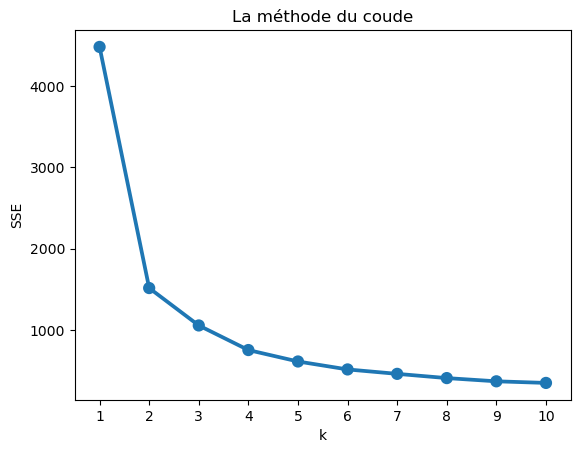

In [128]:
plt.title('La méthode du coude')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.savefig("Elbow.png")

In [132]:
pip install kneed


Note: you may need to restart the kernel to use updated packages.


#### On peut également utiliser le localisateur de genoux pour déterminer le groupe optimal.

In [133]:
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('Le nombre optimal de clusters est: ' + str(kl.elbow))

Le nombre optimal de clusters est: 3


#### Nous construirons nos Kmeans en utilisant 3 groupes.

In [135]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [136]:
data = data.assign(ClusterLabel= model.labels_)


In [137]:
data.groupby("ClusterLabel")[["Income", "TotalAmountSpent"]].median()


,Income,TotalAmountSpent
ClusterLabel,,
0,25261.5,43.0
1,69084.0,1069.5
2,42641.0,145.0


In [139]:
fig = px.scatter(
    data_frame=data,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent",
    color = "ClusterLabel",
    height=500
)
fig.show()

#### Répartition des groupes:
#### Groupe 0 : clients à faibles revenus et à faibles dépenses.
#### Groupe 1 : Clients ayant un revenu modéré et des dépenses modérées.
#### Groupe 3 : Clients qui gagnent beaucoup et dépensent beaucoup.

# <span style="color:blue">Construction du modèle Kmeans avec trois caractéristiques

In [142]:
data = data[["Age", "Income", "TotalAmountSpent"]]


KeyError: "['Age'] not in index"